In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [313]:
#Read csv and show a preview of the data.
data_2014 = pd.read_csv("1-Data/OSMI 2014 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv")
data_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [314]:
# Count the number of participants as we will need this to convert percentages
total_participants = data_2014.shape[0]
print("Total Participants in 2014: ", total_participants)

Total Participants in 2014:  1259


In [315]:
# Count how many tech versus non-tech companies participated in the survey
tech_company=pd.DataFrame(data_2014['tech_company'].value_counts())
tech_company

,tech_company
Yes,1031
No,228


In [316]:
###### From the survey participants we can see that the data is not representative as there were more participants for tech companies than non-tech companies. We have therfore converted our stats in percentages for a fairer comparison.

In [317]:
# Filtering for tech companies
filt = (data_2014["tech_company"] == "Yes")
data_tech = data_2014[filt]

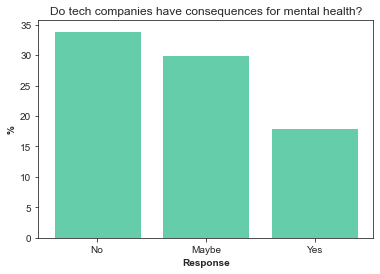

In [318]:
#Creating data frame for mental health consequences
mental_health_consequence=pd.DataFrame(data_tech['mental_health_consequence'].value_counts())
mental_health_consequence["Total Participants"]=total_participants
mental_health_consequence.reset_index(inplace=True)
mental_health_consequence=mental_health_consequence.rename(columns={"index":"Response","mental_health_consequence":"No of Response"})
mental_health_consequence["%"]=round((mental_health_consequence["No of Response"]/mental_health_consequence["Total Participants"])*100,0)

#Creating bar chart to display the results
plt.bar(mental_health_consequence["Response"],mental_health_consequence["%"], color="mediumaquamarine", alpha=1.0, align="center")
#plt.xticks(rotation="vertical")
plt.title("Do tech companies have consequences for mental health?")
plt.xlabel("Response",fontweight = "bold")
plt.ylabel("%",fontweight = "bold")

# Formatting to show counts and percentages on the bars
total = float(len(mental_health_consequence))
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f}'.format(height) + ' (' + '{:1.0f}'.format(100*(height/total)) + '%' + ')',
            ha="center", size=11, color = 'black')


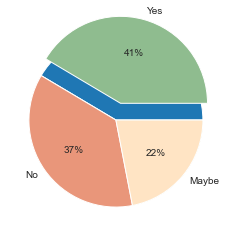

In [319]:
# Create a Pie chart for comparisons
mental_health_consequence=pd.DataFrame(data_tech['mental_health_consequence'].value_counts())
mental_health_consequence["Total Participants"]=total_participants
mental_health_consequence.reset_index(inplace=True)
mental_health_consequence=mental_health_consequence.rename(columns={"index":"Response","mental_health_consequence":"No of Response"})
mental_health_consequence["%"]=round((mental_health_consequence["No of Response"]/mental_health_consequence["Total Participants"])*100,0)

plt.pie(mental_health_consequence["%"])
labels = "Yes", "No", "Dont't Know"

mylabels = ["Yes", "No", "Maybe"]
mycolors = ["darkseagreen", "darksalmon", "bisque"]
myexplode = [0.2, 0, 0]

plt.pie(mental_health_consequence ["%"], labels = mylabels, explode = myexplode, colors = mycolors, autopct="%1.0f%%")
plt.show()

In [320]:
# Filtering for non-tech companies
filt = (data_2014["tech_company"] == "" "No")
data_nontech = data_2014[filt]

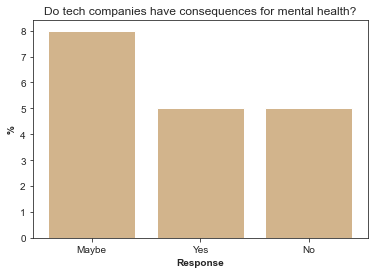

In [321]:
#Creating data frame for consequence
mental_health_consequence=pd.DataFrame(data_nontech['mental_health_consequence'].value_counts())
mental_health_consequence["Total Participants"]=total_participants
mental_health_consequence.reset_index(inplace=True)
mental_health_consequence=mental_health_consequence.rename(columns={"index":"Response","mental_health_consequence":"No of Response"})
mental_health_consequence["%"]=round((mental_health_consequence["No of Response"]/mental_health_consequence["Total Participants"])*100,0)

#Creating bar chart to display the results
plt.bar(mental_health_consequence["Response"],mental_health_consequence["%"], color="tan", alpha=1.0, align="center")
#plt.xticks(rotation="vertical")
plt.title("Do tech companies have consequences for mental health?")
plt.xlabel("Response",fontweight = "bold")
plt.ylabel("%",fontweight = "bold")

# Formatting to show counts and percentages on the bars
total = float(len(mental_health_consequence))
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f}'.format(height) + ' (' + '{:1.0f}'.format(100*(height/total)) + '%' + ')',
            ha="center", size=11, color = 'black')


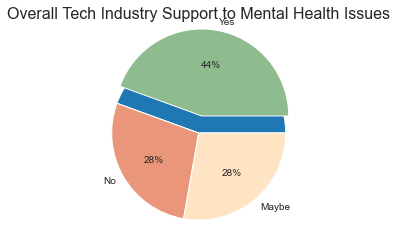

In [322]:
# Create a Pie chart for comparisons
#Creating data frame for consequence
mental_health_consequence=pd.DataFrame(data_nontech['mental_health_consequence'].value_counts())
mental_health_consequence["Total Participants"]=total_participants
mental_health_consequence.reset_index(inplace=True)
mental_health_consequence=mental_health_consequence.rename(columns={"index":"Response","mental_health_consequence":"No of Response"})
mental_health_consequence["%"]=round((mental_health_consequence["No of Response"]/mental_health_consequence["Total Participants"])*100,0)

plt.pie(mental_health_consequence["%"])
labels = "Yes", "No", "Dont't Know"
plt.title('Overall Tech Industry Support to Mental Health Issues', size = 16)

mylabels = ["Yes", "No", "Maybe"]
mycolors = ["darkseagreen", "darksalmon", "bisque"]
myexplode = [0.2, 0, 0]

plt.pie(mental_health_consequence ["%"], labels = mylabels, explode = myexplode, colors = mycolors, autopct="%1.0f%%")
plt.show()

In [323]:
# Compare how tech companies proportion consequences for mental health vs physical health

In [324]:
#Creating a data frame for mental versus physical health in the tech industry. Is it treated the same?. 
mental_vs_physical=pd.DataFrame(data_tech["mental_vs_physical"].value_counts())
mental_vs_physical

,mental_vs_physical
Don't know,478
Yes,299
No,254


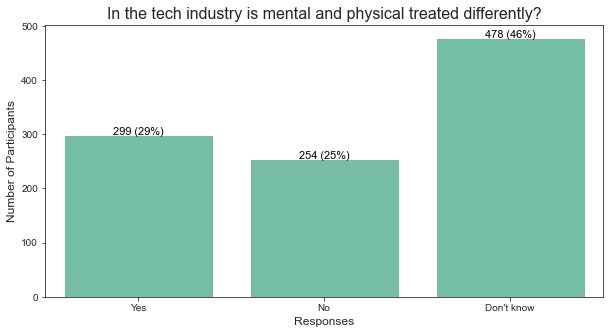

In [333]:
# Filtering and renaming data
mental_vs_physical = pd.DataFrame(data_tech["mental_vs_physical"])

# Creating a count plot 
plt.figure(figsize=(10,5))
sns.set_style("ticks")
ax1 = sns.countplot(x="mental_vs_physical", data=mental_vs_physical, color = "mediumaquamarine", saturation = 0.7)

# Formatting chart axes, title, size
plt.title('In the tech industry is mental and physical treated differently?', size = 16)
plt.xlabel("Responses", size = 12)
plt.ylabel('Number of Participants', size = 12)

# Formatting to show counts and percentages on the bars
total = float(len(mental_vs_physical))
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f}'.format(height) + ' (' + '{:1.0f}'.format(100*(height/total)) + '%' + ')',
            ha="center", size=11, color = 'black') 

plt.show()

In [326]:
#Creating a data frame for observed negative consequences relating mental health conditions in the tech industry. 
obs_consequence=pd.DataFrame(data_tech["obs_consequence"].value_counts())
obs_consequence

,obs_consequence
No,891
Yes,140


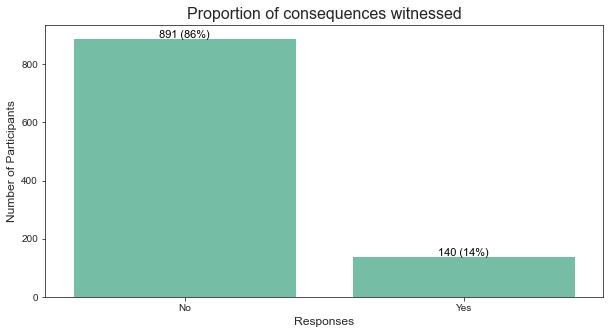

In [334]:
# Filtering and renaming data
obs_consequence = pd.DataFrame(data_tech["obs_consequence"])

# Creating a count plot 
plt.figure(figsize=(10,5))
sns.set_style("ticks")
ax1 = sns.countplot(x="obs_consequence", data=obs_consequence, color = "mediumaquamarine", saturation = 0.7)

# Formatting chart axes, title, size
plt.title("Proportion of consequences witnessed", size = 16)
plt.xlabel("Responses", size = 12)
plt.ylabel("Number of Participants", size = 12)

# Formatting to show counts and percentages on the bars
total = float(len(mental_vs_physical))
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f}'.format(height) + ' (' + '{:1.0f}'.format(100*(height/total)) + '%' + ')',
            ha="center", size=11, color = 'black') 

plt.show()

In [328]:
#### Do employees feel feel that the tech industry supports mental health and wellbeing?
#Based on the data